# Assignment 3

## 1. Autoencoder

In [15]:
%matplotlib inline

import tensorflow as tf
import keras
from keras import applications
from keras import backend
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing import sequence
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, Activation
from keras.models import Model, Sequential
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_shape = x_train.shape
pixel_len = input_shape[1]

x_train = x_train.reshape(len(x_train), pixel_len, pixel_len, 1)
x_test = x_test.reshape(len(x_test), pixel_len, pixel_len, 1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

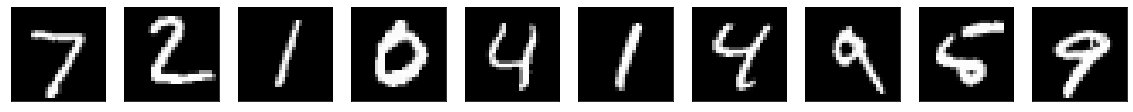

In [17]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
input_img = Input(shape=(pixel_len, pixel_len, 1))

# encoder
model = Conv2D(32, (3, 3), padding='same', activation='relu')(input_img)
model = MaxPooling2D((2, 2), padding='same')(model)
model = Conv2D(1,(3, 3), padding='same', activation='relu')(model)
model = MaxPooling2D((2, 2), padding='same')(model)

# decoder
model = Conv2D(1,(3, 3), padding='same', activation='relu')(model)
model = UpSampling2D((2, 2))(model)
model = Conv2D(32, (3, 3), padding='same', activation='relu')(model)
model = UpSampling2D((2, 2))(model)
model = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(model)

autoencoder = Model(input_img, model)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 1)         289       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 1)           10        
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 1)         0   

In [22]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0248 - val_loss: 0.0230
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0223 - val_loss: 0.0209
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0203 - val_loss: 0.0191
Epoch 4/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0188 - val_loss: 0.0178
Epoch 5/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0177 - val_loss: 0.0169
Epoch 6/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 7/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0164 - val_loss: 0.0160
Epoch 8/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0160 - val_loss: 0.0155
Epoch 9/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0157 - val_loss: 0.0153
Epoch

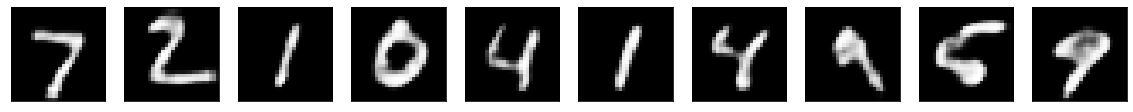

In [25]:
pred_img = autoencoder.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(pred_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image classification

### 2.1 Deep CNN

The CNN model includes two convolutional transformations that uses (1) 128 filters with a 3x3 kernel and (2) 32 filters with 3x3 filters with a 3x3 kernel, and one pooling layer: max pooling with a 2x2 window. Then the model flattens the vectors and goes through two dense layers to get the output, which is the integer that maps to each category.

In [70]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [35]:
cnn_model = Sequential()
cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(pixel_len, pixel_len, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        36896     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [36]:
cnn_model.fit(x_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2799 - accuracy: 0.9140 - val_loss: 0.0582 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0910 - accuracy: 0.9726 - val_loss: 0.0424 - val_accuracy: 0.9849
Epoch 3/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 4/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0524 - accuracy: 0.9847 - val_loss: 0.0309 - val_accuracy: 0.9887
Epoch 5/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0285 - val_accuracy: 0.9908
Epoch 6/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0256 - val_accuracy: 0.9912
Epoch 7/10
60000/60000 [==============================] - 94s 2ms/

In [37]:
cnn_eval_score = cnn_model.evaluate(x_test, y_test)
print('Test loss:', cnn_eval_score[0])
print('Test accuracy:', cnn_eval_score[1])

10000/10000 [==============================] - 3s 317us/step
Test loss: 0.027442988229725643
Test accuracy: 0.9914000034332275


### 2.2 Transfer learning

In [62]:
transfer_x_train = np.tile(x_train, (1, 1, 1, 3))
transfer_x_test = np.tile(x_test, (1, 1, 1, 3))

In [63]:
transfer_x_train = np.pad(transfer_x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
transfer_x_test = np.pad(transfer_x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [64]:
transfer_x_train.shape

(60000, 32, 32, 3)

In [68]:
transfer_model = Sequential()
transfer_model.add(applications.resnet.ResNet50(weights = "imagenet", include_top=False, input_shape=(32, 32, 3)))

# freeze the weights
for layer in transfer_model.layers:
    layer.trainable = False

# Dense layer
transfer_model.add(Flatten())
transfer_model.add(Dense(512, activation='relu'))
transfer_model.add(Dropout(0.35))
transfer_model.add(Dense(64, activation='relu'))
transfer_model.add(Dropout(0.35))
transfer_model.add(Dense(10, activation='softmax'))

transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

In [71]:
transfer_model.fit(transfer_x_train, y_train,
              batch_size=128,
              epochs=10,
              verbose=1,
              validation_data=(transfer_x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 269s 4ms/step - loss: 1.0092 - accuracy: 0.6867 - val_loss: 2.8465 - val_accuracy: 0.1511
Epoch 2/10
60000/60000 [==============================] - 270s 4ms/step - loss: 0.6589 - accuracy: 0.7956 - val_loss: 3.4635 - val_accuracy: 0.1062
Epoch 3/10
60000/60000 [==============================] - 273s 5ms/step - loss: 0.5738 - accuracy: 0.8219 - val_loss: 3.1264 - val_accuracy: 0.1509
Epoch 4/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.5167 - accuracy: 0.8385 - val_loss: 2.8753 - val_accuracy: 0.1463
Epoch 5/10
60000/60000 [==============================] - 233s 4ms/step - loss: 0.4817 - accuracy: 0.8495 - val_loss: 2.9366 - val_accuracy: 0.1392
Epoch 6/10
60000/60000 [==============================] - 207s 3ms/step - loss: 0.4517 - accuracy: 0.8566 - val_loss: 2.8417 - val_accuracy: 0.1227
Epoch 7/10
60000/60000 [==============================] - 251s

In [72]:
transfer_eval_score = transfer_model.evaluate(transfer_x_test, y_test)
print('Test loss:', transfer_eval_score[0])
print('Test accuracy:', transfer_eval_score[1])

10000/10000 [==============================] - 29s 3ms/step
Test loss: 3.8906137199401853
Test accuracy: 0.10339999943971634


Is there anything wrong with my code? It's strange that the acc on the test set is pretty low...

## 3. Text classification

I'm confused with how to evaluate the task. If I follow the description in the question, it is a binary classification task that whether the topic is discussed in the text. The other option is a topic ranking task, which assigns the probility to each topic and decides which topic(s) is(are) most possible discussed. 

I looked into the dataset and found that it is not always (actually a lot) the case that each row sum to 1. Thus I'm not sure how to evaluate the weights of each topic in the dataset. In this assignment, I change the labels to either 0 or 1, making it a multi-label binary classification.

### 3.1 RNN

In [23]:
max_seq_len = 64
num_classes = 15

In [3]:
df = pd.read_csv('tweets_with_labels.csv', sep='\t', header=[0])
data_df = df['tweet']
labels = df.iloc[:,2:] 
X_train, X_test, text_y_train, text_y_test = train_test_split(data_df, labels, test_size=0.2)

In [21]:
text_y_train = np.array(text_y_train)
text_y_test = np.array(text_y_test)

In [4]:
text_y_train = np.where(text_y_train == 0, 0, 1)
text_y_test = np.where(text_y_test == 0, 0, 1)

In [5]:
word_tokenizer = Tokenizer(num_words=None, lower=True, split=' ', char_level=False, oov_token='UNK')
word_tokenizer.fit_on_texts(X_train)

In [13]:
word_vocab_size = len(word_tokenizer.word_index)

In [26]:
word_vocab_size

38347

In [16]:
encoded_train = [one_hot(s, word_vocab_size) for s in X_train]
encoded_test = [one_hot(s, word_vocab_size) for s in X_test]

In [18]:
encoded_train = sequence.pad_sequences(encoded_train, maxlen=max_seq_len)
encoded_test = sequence.pad_sequences(encoded_test, maxlen=max_seq_len)

In [47]:
rnn_model = Sequential()
rnn_model.add(Embedding(40000, 128, input_length=max_seq_len))
rnn_model.add(Bidirectional(LSTM(64)))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(num_classes, activation='softmax'))
rnn_model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 64, 128)           5120000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 15)                1935      
Total params: 5,220,751
Trainable params: 5,220,751
Non-trainable params: 0
_________________________________________________________________


In [48]:
rnn_model.fit(encoded_train, text_y_train, 
              validation_data=(encoded_test, text_y_test),
              batch_size=128,
              verbose=1,
              epochs=5)

c:\users\zhuda\anaconda3\envs\python3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 62356 samples, validate on 15590 samples
Epoch 1/5
62356/62356 [==============================] - 104s 2ms/step - loss: 0.2628 - accuracy: 0.9019 - val_loss: 0.2153 - val_accuracy: 0.9207
Epoch 2/5
62356/62356 [==============================] - 98s 2ms/step - loss: 0.2107 - accuracy: 0.9192 - val_loss: 0.2066 - val_accuracy: 0.9197
Epoch 3/5
62356/62356 [==============================] - 98s 2ms/step - loss: 0.1980 - accuracy: 0.9205 - val_loss: 0.2063 - val_accuracy: 0.9205
Epoch 4/5
62356/62356 [==============================] - 100s 2ms/step - loss: 0.1896 - accuracy: 0.9214 - val_loss: 0.2055 - val_accuracy: 0.9195
Epoch 5/5
62356/62356 [==============================] - 134s 2ms/step - loss: 0.1831 - accuracy: 0.9217 - val_loss: 0.2064 - val_accuracy: 0.9194


### 3.2 Char-CNN

In [30]:
max_char_len = 256    # since tweets are not very long, so that I select a small number for the max character length for each seq

In [31]:
train_texts = [s.lower() for s in X_train.values]
test_texts = [s.lower() for s in X_test.values]

In [32]:
char_tokenizer = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
char_tokenizer.fit_on_texts(train_texts)

alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1
    
char_tokenizer.word_index = char_dict.copy()
# add oov
char_tokenizer.word_index[char_tokenizer.oov_token] = max(char_dict.values()) + 1

train_seq = char_tokenizer.texts_to_sequences(train_texts)
test_seq = char_tokenizer.texts_to_sequences(test_texts)

train_seq = sequence.pad_sequences(train_seq, maxlen=max_char_len)
test_seq = sequence.pad_sequences(test_seq, maxlen=max_char_len)

In [33]:
vocab_size = len(char_tokenizer.word_index)
# conv, FFNN and other hyperparameters from https://arxiv.org/pdf/1509.01626.pdf
conv_layers = [[256, 7, 3], [256, 7, 3], [256, 3, -1], [256, 3, -1], [256, 3, -1], [256, 3, 3]]
FFNN_layers = [1024, 1024]

In [34]:
embed_weights = []
# padding
embed_weights.append(np.zeros(vocab_size))

for char, index in char_tokenizer.word_index.items():
    char_embed = np.zeros(vocab_size)
    char_embed[i-1] = 1
    embed_weights.append(char_embed)
embed_weights = np.array(embed_weights)

In [54]:
embed_layer = Embedding(vocab_size+1, 69, input_length=max_char_len, weights=[embed_weights])
inputs = Input(shape=(max_char_len,), name='input', dtype='int64')

x = embed_layer(inputs)
for layer in conv_layers:
    x = Conv1D(layer[0], layer[1])(x)
    x = Activation('relu')(x)
    if layer[2] != -1:
        x = MaxPooling1D(layer[2])(x)
x = Flatten()(x)
for feed_forward in FFNN_layers:
    x = Dense(feed_forward, activation='relu')(x)
    x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
char_cnn_model = Model(inputs=inputs, outputs=predictions)
char_cnn_model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

char_cnn_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 256)               0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 256, 69)           4830      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 250, 256)          123904    
_________________________________________________________________
activation_7 (Activation)    (None, 250, 256)          0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 83, 256)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 77, 256)           459008    
_________________________________________________________________
activation_8 (Activation)    (None, 77, 256)           0   

In [55]:
char_cnn_model.fit(train_seq, text_y_train,
                  validation_data=(test_seq, text_y_test),
                  batch_size=128,
                  epochs=5,
                  verbose=1)

c:\users\zhuda\anaconda3\envs\python3\lib\site-packages\tensorflow\python\ops\gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 62356 samples, validate on 15590 samples
Epoch 1/5
62356/62356 [==============================] - 335s 5ms/step - loss: 0.3309 - accuracy: 0.8774 - val_loss: 0.3182 - val_accuracy: 0.8803
Epoch 2/5
62356/62356 [==============================] - 356s 6ms/step - loss: 0.3160 - accuracy: 0.8800 - val_loss: 0.3105 - val_accuracy: 0.8805
Epoch 3/5
62356/62356 [==============================] - 317s 5ms/step - loss: 0.2978 - accuracy: 0.8832 - val_loss: 0.2867 - val_accuracy: 0.8878
Epoch 4/5
62356/62356 [==============================] - 297s 5ms/step - loss: 0.2794 - accuracy: 0.8897 - val_loss: 0.2733 - val_accuracy: 0.8920
Epoch 5/5
62356/62356 [==============================] - 303s 5ms/step - loss: 0.2673 - accuracy: 0.8974 - val_loss: 0.2631 - val_accuracy: 0.9005


### 3.3 Compare

We use F1 to evaluate the model performance. The metric reports the precision, recall, and f1 by classes. We use the macro F1 as the main evaluation metric.

In [58]:
rnn_pred = rnn_model.predict(encoded_test)
rnn_pred = np.where(rnn_pred >= 0.5, 1, 0)

In [59]:
flattened_pred_rnn = rnn_pred.flatten()
flattened_true = text_y_test.flatten()
print(classification_report(flattened_true, flattened_pred_rnn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    204399
           1       0.96      0.37      0.54     29451

   micro avg       0.92      0.92      0.92    233850
   macro avg       0.94      0.69      0.75    233850
weighted avg       0.92      0.92      0.90    233850



In [62]:
char_cnn_pred = char_cnn_model.predict(test_seq)
char_cnn_pred = np.where(char_cnn_pred >= 0.5, 1, 0)
flatten_pred_char_cnn = char_cnn_pred.flatten()
print(classification_report(flattened_true, flatten_pred_char_cnn))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    204399
           1       0.96      0.22      0.36     29451

   micro avg       0.90      0.90      0.90    233850
   macro avg       0.93      0.61      0.65    233850
weighted avg       0.91      0.90      0.87    233850



Both Bi-LSTM and Char CNN are trained 5 epochs. For the word-level model, only tf-idf is used to calculate embedding weights. The Bi-LSTM model achieves 0.75 on F1 and Character-based CNN gets 0.65 on F1. The results from the two metrics show that the Bi-LSTM model achieves the better performance. If we do not increase the model complexity (especially for the Bi-LSTM), both non-contextualized embeddings, e.g. GloVe, and contextualized language models, e.g. ElMo, can largely improve the score.